In [9]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import textdistance as txd
import geopandas as gpd
import folium
from folium.plugins import HeatMap
# import geodatasets

In [10]:
def PreProcessamento(palavra):

    nova_palavra = palavra
    if isinstance(palavra, str):

        nova_palavra = nova_palavra.replace('ç', 'c')
        nova_palavra = nova_palavra.replace('ú', 'u')
        nova_palavra = nova_palavra.replace('í', 'i')
        nova_palavra = nova_palavra.replace('â', 'a')
        nova_palavra = nova_palavra.replace('ã', 'a')
        nova_palavra = nova_palavra.replace('á', 'a')
        nova_palavra = nova_palavra.replace('é', 'e')
        nova_palavra = nova_palavra.replace('ê', 'e')
        nova_palavra = nova_palavra.strip().upper()

    return nova_palavra


In [11]:
def PalavraMaisProxima(cidade, ibge_data):

    # cidade = 'SEVERÍNIA'
    lista_ibge = ibge_data['municipio'].unique()
    cidade = cidade.strip()
    equal_word = 'palavraabsolutamentealeatoriataoaleatoriaqueadistanciaehenorme'
    distancia = txd.levenshtein(cidade, equal_word)

    for palavra in lista_ibge:
        if type(palavra) == str:
            nova_distancia = txd.levenshtein(cidade, palavra)
            if nova_distancia < distancia:
                distancia = nova_distancia
                equal_word = palavra

    return equal_word

In [12]:
def CorrigirCidade(nome_cidade):
    if isinstance(nome_cidade, str):
        nome_cidade = nome_cidade.strip()
        if nome_cidade == 'S.PAULO':
            return 'SAO PAULO'
        elif nome_cidade == 'S.BERNARDO DO CAMPO':
            return 'SAO BERNARDO DO CAMPO'
        elif nome_cidade == 'S.ANDRE':
            return 'SANTO ANDRE'
        elif nome_cidade == 'S.CAETANO DO SUL':
            return 'SAO CAETANO DO SUL'
        elif nome_cidade == 'S.ISABEL':
            return 'SANTA ISABEL'
        elif nome_cidade == 'S.LOURENCO DA SERRA':
            return 'SAO LOURENCO DA SERRA'
        elif nome_cidade == 'S.VICENTE':
            return 'SAO VICENTE'
        elif nome_cidade == 'S.ROQUE':
            return 'SAO ROQUE'
    return nome_cidade

In [13]:
def CorrecaoHorario(hora):

    string_hora = str(hora)
    n_hora = string_hora[0:2] + ':' + string_hora[-2:] 

    return n_hora

In [14]:
def CategorizarHorario(horario):
    if pd.isna(horario):
        return np.nan
    elif 0 <= horario.hour < 6:
        return 'Madrugada'
    elif 6 <= horario.hour < 12:
        return 'Manhã'
    elif 12 <= horario.hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

In [15]:
def CorrigirRubrica(palavra):
    if type(palavra) == str:
        palavra = palavra.replace("'GRAVÍSSIMA'", "GRAVISSIMA")

    return palavra

In [16]:
def TipoPoliciamentoMaisProximo(crime, lista):
    equal_word = 'palavraabsolutamentealeatoriataoaleatoriaqueadistanciaehenorme'
    distancia = txd.levenshtein(crime, equal_word)

    for real_crime in lista:
        if type(real_crime) == str:
            nova_distancia = txd.levenshtein(crime, real_crime)
            if nova_distancia < distancia:
                distancia = nova_distancia
                equal_word = real_crime

    return equal_word

In [17]:
#IMPORTA TODOS OS DATAFRAMES DE BO'S:


df_dicio = {}

directory = os.listdir('/home/thiago/datasets/Crime Data in Brazil')

for file in directory:
    if file != 'auxiliar':
        if file.startswith('RDO'):
            nome_filev = file
            df_v = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_filev)
            nome_key = file[:-4]
            df_dicio[nome_key] = df_v


        elif file[:-4][-1] == '1':        #para os files que representam 1o semestres:
            for file2 in directory:
                if (file != file2) and (file[:-5] == file2[:-5]):       #encontrando o 2o semestre do ano em questao:
                    nome_file1 = file
                    nome_file2 = file2
                    df1 = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_file1)
                    df2 = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_file2)

                    nome_key = file[:-6]

                    df_dicio[nome_key] = pd.concat([df1 ,df2], ignore_index=True)   #juntando os dois semestres.

        elif (file[:-4][-1] != '1') and (file[:-4][-1] != '2'):       #para os files que nao sao subdivididos em 2 semestres:
            nome_file = file
            df = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_file)
            nome_key = file[:-4]
            df_dicio[nome_key] = df


/tmp/ipykernel_8277/1726116389.py:12: DtypeWarning: Columns (22,23,24,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_v = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_filev)
/tmp/ipykernel_8277/1726116389.py:22: DtypeWarning: Columns (17,18,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_file1)
/tmp/ipykernel_8277/1726116389.py:23: DtypeWarning: Columns (24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_file2)
/tmp/ipykernel_8277/1726116389.py:22: DtypeWarning: Columns (26,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/home/thiago/datasets/Crime Data in Brazil/' + nome_file1)
/tmp/ipykernel_8277/1726116389.py:23: DtypeWarning: Columns (15,17,18,21,26,30) have mixed ty

In [18]:
# #OS RDOS ESTAO BAGUNCADOS. ANOS DIVERSOS EM CADA UM. FAZ-SE UM DATAFRAME PARA CADA ANO, DE 2010 A 2016:


# for ano in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:

#     df_rdo1 = df_dicio['RDO_1'].copy()
#     df_rdo1 = df_rdo1.loc[df_rdo1['ANO_BO'] == ano]

#     df_rdo2 = df_dicio['RDO_2'].copy()
#     df_rdo2 = df_rdo1.loc[df_rdo2['ANO_BO'] == ano]

#     df_rdo3 = df_dicio['RDO_3'].copy()
#     df_rdo3 = df_rdo3.loc[df_rdo3['ANO_BO'] == ano]

#     df = pd.concat([df_rdo1, df_rdo2, df_rdo3], ignore_index=True)
#     nome_key = 'BO_' + str(ano) + '_v'
#     df_dicio[nome_key] = df



#OS RDOS ESTAO BAGUNCADOS. ANOS DIVERSOS EM CADA UM. FAZ-SE UM DATAFRAME PARA CADA ANO, DE 2010 A 2016:
## ACHO QUE CORRIGI O ERRO ANTERIOR.


for ano in [2010, 2011, 2012]:

    df_rdo1 = df_dicio['RDO_1'].copy()
    df_rdo1 = df_rdo1.loc[df_rdo1['ANO_BO'] == ano]

    nome_key = 'BO_' + str(ano) + '_v'
    df_dicio[nome_key] = df_rdo1

for ano in [2013, 2014, 2015]:

    df_rdo2 = df_dicio['RDO_2'].copy()
    df_rdo2 = df_rdo1.loc[df_rdo2['ANO_BO'] == ano]

    nome_key = 'BO_' + str(ano) + '_v'
    df_dicio[nome_key] = df_rdo2

for ano in [2016, 2017]:

    df_rdo3 = df_dicio['RDO_3'].copy()
    df_rdo3 = df_rdo3.loc[df_rdo3['ANO_BO'] == ano]

    nome_key = 'BO_' + str(ano) + '_v'
    df_dicio[nome_key] = df_rdo3

    # df = pd.concat([df_rdo1, df_rdo2, df_rdo3], ignore_index=True)
    # nome_key = 'BO_' + str(ano) + '_v'
    # df_dicio[nome_key] = df


In [19]:
#IMPORTA O DATAFRAME DO IBGE (com a populacao de cada municipio em cada ano):

ibge_data = pd.read_csv('/home/thiago/datasets/serie_populacao2000a2023.csv', encoding= 'ISO-8859-1', sep=';')

In [20]:
#PREPROCESSAMENTO DA COLUNA MUNICIPIOS DO DATAFRAME DO IBGE:

# for i in range(len(ibge_data)):
#     if type(ibge_data['municipio'][i]) == str:
#         nome = ibge_data['municipio'][i]
        
#         ##modo errado no pandas 3.0:
#         # ibge_data['municipio'][i] = PreProcessamento(nome)

#         #modo correto no pandas 3.0 (pandas gritou comigo):
#         ibge_data.loc[i, 'municipio'] = PreProcessamento(nome)


# MODO MAIS EFICIENTE:
ibge_data['municipio'] = ibge_data['municipio'].apply(PreProcessamento)

In [21]:
for ano in df_dicio.keys():
    # Aplicar a função CorrigirRubrica à coluna 'RUBRICA' para o ano especificado usando .loc
    df_dicio[ano]['RUBRICA'] = df_dicio[ano]['RUBRICA'].apply(CorrigirRubrica)


/tmp/ipykernel_8277/3228982636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dicio[ano]['RUBRICA'] = df_dicio[ano]['RUBRICA'].apply(CorrigirRubrica)
/tmp/ipykernel_8277/3228982636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dicio[ano]['RUBRICA'] = df_dicio[ano]['RUBRICA'].apply(CorrigirRubrica)
/tmp/ipykernel_8277/3228982636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [22]:
set_crimes = set()
for key in df_dicio.keys():
    set_crimes = set_crimes.union( set(df_dicio[key]['RUBRICA'].unique()) )

lista_crimes = list(set_crimes)

In [23]:
lista_crimes

['A.I.-Lesão corporal culposa (art. 129. §6o.)',
 'Estupro de vulneravel (art.217-A)',
 'Roubo (art. 157)',
 'Homicídio culposo (art. 121, §3o.)',
 'Tráfico de entorpecente (Art. 12)',
 'Lesão corporal  de natureza GRAVISSIMA (art. 129, §2o.)',
 'Porte de entorpecente (Art. 16)',
 'A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)',
 'A.I.-Lesão corporal  de natureza GRAVISSIMA (art. 129, §2o.)',
 'Lesão corporal seguida de morte (art. 129, §3o.)',
 'Homicídio simples (art. 121)',
 'A.I.-Furto de coisa comum (art. 156)',
 'Lesão corporal culposa (art. 129. §6o.)',
 'A.I.-Furto (art. 155)',
 'A.I.-Roubo (art. 157)',
 'A.I.-Estupro (art.213)',
 'A.I.-Porte de objeto destinado à fabricação de entorpecente (Art. 13)',
 'A.I.-Lesão corporal (art 129 § 9º)',
 'A.I.-Drogas sem autorização ou em desacordo (Art.33, caput)',
 'Drogas sem autorização ou em desacordo (Art.33, caput)',
 'A.I.-Lesão corporal (art. 129)',
 'A.I.-Porte de entorpecente (Art. 16)',
 'A.I.-Tráfico de entorpecente (A

In [24]:
# Dicionario contendo uma categorização em relação a cada crime. Divididos entre o tipo de policiamento exigido para cada grupo de crime.
#  (~Pouco grave, medio grave, muito grave e crime de transito. (será?)~) 

crime_categorizacao = {
    'Policiamento Comunitário': [
        'Homicídio culposo (art. 121, §3o.)',
        'A.I.-Homicídio culposo (art. 121, §3o.)',
        'Lesão corporal (art. 129)',
        'Lesão corporal (art 129 § 9º)',
        'Lesão corporal culposa (art. 129. §6o.)',
        'Lesão corporal culposa na direção de veículo automotor (Art. 303)',
        'Lesão corporal de natureza GRAVE (art. 129, §1o.)',
        "Lesão corporal  de natureza GRAVISSIMA (art. 129, §2o.)",
        'Lesão corporal seguida de morte (art. 129, §3o.)',
        'A.I.-Lesão corporal (art. 129)',
        'A.I.-Lesão corporal (art 129 § 9º)',
        'A.I.-Lesão corporal culposa (art. 129. §6o.)',
        'A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)',
        'Furto de coisa comum (art. 156)',
        'A.I.-Furto de coisa comum (art. 156)'
    ],
    
    'Policiamento Tático': [
        'Roubo (art. 157)',
        'A.I.-Roubo (art. 157)',
        'Homicídio simples (art. 121)',
        'A.I.-Homicídio simples (art. 121)',
        'Homicídio qualificado (art. 121, §2o.)',
        'A.I.-Homicídio qualificado (art. 121, §2o.)',
        'Estupro (art.213)',
        'A.I.-Estupro (art.213)',
        'Estupro de vulneravel (art.217-A)',
        'A.I.-Estupro de vulneravel (art.217-A)',
        'Tráfico de entorpecente (Art. 12)',
        'A.I.-Tráfico de entorpecente (Art. 12)',
        'Drogas sem autorização ou em desacordo (Art.33, caput)',
        'A.I.-Drogas sem autorização ou em desacordo (Art.33, caput)',
        'Porte de entorpecente (Art. 16)',
        'A.I.-Porte de entorpecente (Art. 16)',
        'Porte de objeto destinado à fabricação de entorpecente (Art. 13)',
        'A.I.-Porte de objeto destinado à fabricação de entorpecente (Art. 13)',
        'Induzir, instigar ou auxiliar alguém ao uso indevido de droga(Art.33,§2º)',
        'A.I.-Induzir, instigar ou auxiliar alguém ao uso indevido de droga(Art.33,§2º)',
        'Oferecer droga a pessoa de seu relacionamento (Art.33,§3º)',
        'A.I.-Oferecer droga a pessoa de seu relacionamento (Art.33,§3º)'
    ],
    
    'Policiamento Preventivo': [
        'Furto qualificado (art. 155, §4o.)',
        'A.I.-Furto qualificado (art. 155, §4o.)',
        'Furto (art. 155)',
        'A.I.-Furto (art. 155)'
    ],
    
    'Policiamento de Trânsito': [
        'Homicídio culposo na direção de veículo automotor (Art. 302)',
        'A.I.-Homicídio culposo na direção de veículo automotor (Art. 302)',
        'Lesão corporal culposa na direção de veículo automotor (Art. 303)',
        'A.I.-Lesão corporal culposa na direção de veículo automotor (Art. 303)'
    ]
}



In [25]:
def mapear_policiamento(crime):
    for tipo_policiamento, crimes in crime_categorizacao.items():
        if crime in crimes:
            return tipo_policiamento

In [26]:
for ano in df_dicio.keys():
    df_dicio[ano]['TIPO POLICIAMENTO'] = df_dicio[ano]['RUBRICA'].apply(mapear_policiamento)

/tmp/ipykernel_8277/424050305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dicio[ano]['TIPO POLICIAMENTO'] = df_dicio[ano]['RUBRICA'].apply(mapear_policiamento)
/tmp/ipykernel_8277/424050305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dicio[ano]['TIPO POLICIAMENTO'] = df_dicio[ano]['RUBRICA'].apply(mapear_policiamento)
/tmp/ipykernel_8277/424050305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [27]:
print(df_dicio['BO_2016'][['RUBRICA', 'TIPO POLICIAMENTO']].head())

                                             RUBRICA         TIPO POLICIAMENTO
0                                   Furto (art. 155)   Policiamento Preventivo
1                                   Roubo (art. 157)       Policiamento Tático
2  Drogas sem autorização ou em desacordo (Art.33...       Policiamento Tático
3                                   Roubo (art. 157)       Policiamento Tático
4                          Lesão corporal (art. 129)  Policiamento Comunitário


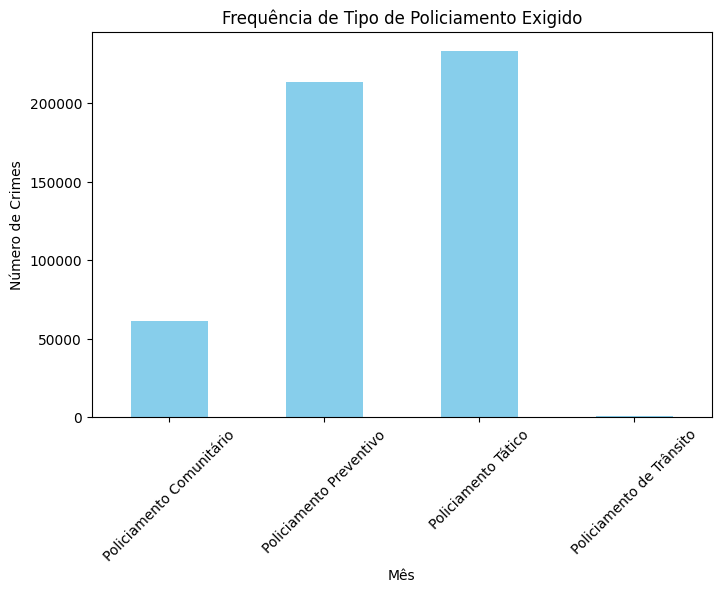

In [28]:
frequencias = df_dicio['BO_2016_v']['TIPO POLICIAMENTO'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
frequencias.plot(kind='bar', color='skyblue')
plt.title('Frequência de Tipo de Policiamento Exigido')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')
plt.xticks(rotation=45)
plt.show()

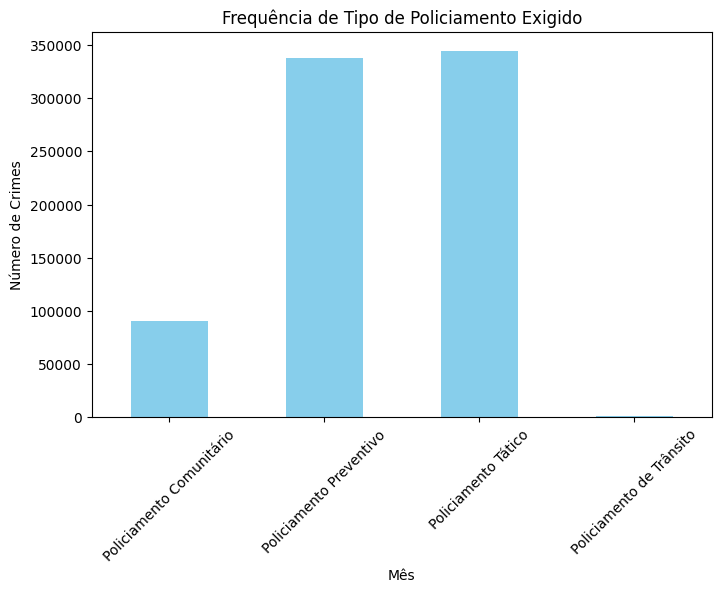

In [29]:
frequencias = df_dicio['BO_2016']['TIPO POLICIAMENTO'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
frequencias.plot(kind='bar', color='skyblue')
plt.title('Frequência de Tipo de Policiamento Exigido')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Convertendo latitude e longitude de graus para radianos
df_dicio['BO_2016']['LAT_RAD'] = np.radians(df_dicio['BO_2016']['LATITUDE'])
df_dicio['BO_2016']['LON_RAD'] = np.radians(df_dicio['BO_2016']['LONGITUDE'])

# Calculando seno e cosseno para a latitude
df_dicio['BO_2016']['LAT_SIN'] = np.sin(df_dicio['BO_2016']['LAT_RAD'])
df_dicio['BO_2016']['LAT_COS'] = np.cos(df_dicio['BO_2016']['LAT_RAD'])

# Calculando seno e cosseno para a longitude
df_dicio['BO_2016']['LON_SIN'] = np.sin(df_dicio['BO_2016']['LON_RAD'])
df_dicio['BO_2016']['LON_COS'] = np.cos(df_dicio['BO_2016']['LON_RAD'])


In [31]:
df_dicio['BO_2016'].head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21,TIPO POLICIAMENTO,LAT_RAD,LON_RAD,LAT_SIN,LAT_COS,LON_SIN,LON_COS
0,3784,2016,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,78º D.P. JARDINS,2016,...,1000,C,NaN,Policiamento Preventivo,-0.411287,-0.814232,-0.399789,0.916607,-0.727198,0.686427
1,3426,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016,...,0,C,NaN,Policiamento Tático,-0.410894,-0.814055,-0.399429,0.916764,-0.727077,0.686556
2,6359,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016,...,0,C,NaN,Policiamento Tático,-0.410889,-0.814032,-0.399424,0.916766,-0.727061,0.686573
3,1267,2016,10103,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,DECAP,DEL.SEC.8º SAO MATEUS,49º D.P. SAO MATEUS,2016,...,15,C,NaN,Policiamento Tático,-0.412060,-0.810794,-0.400497,0.916298,-0.724835,0.688923
4,4804,2016,10106,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,2016,...,625,C,NaN,Policiamento Comunitário,-0.411443,-0.813685,-0.399932,0.916545,-0.726823,0.686825


# Treinamento do Modelo de Policiamento

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [33]:
# 🔹 Pegamos os dados de um dos BOs
df = df_dicio['BO_2016'].copy()

# Convertendo para float
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Removendo linhas que ainda tenham NaN
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Agora podemos converter para radianos e calcular seno/cosseno
df['LAT_RAD'] = np.radians(df['LATITUDE'])
df['LON_RAD'] = np.radians(df['LONGITUDE'])
df['LAT_SIN'] = np.sin(df['LAT_RAD'])
df['LAT_COS'] = np.cos(df['LAT_RAD'])
df['LON_SIN'] = np.sin(df['LON_RAD'])
df['LON_COS'] = np.cos(df['LON_RAD'])

# 🔹 Selecionando features e target
X = df[['LAT_SIN', 'LAT_COS', 'LON_SIN', 'LON_COS']]
y = df['TIPO POLICIAMENTO']

# 🔹 Convertendo a saída para números
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Transforma categorias em números (0, 1, 2, 3)

# 🔹 Dividindo em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo para PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)


In [34]:
class CrimeDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Criando os datasets e dataloaders
train_dataset = CrimeDataset(X_train_tensor, y_train_tensor)
val_dataset = CrimeDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [35]:
class CrimeNN(nn.Module):
    def __init__(self):
        super(CrimeNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)  # Entrada: 4 features (lat/lon seno e cosseno)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 4)  # Saída: 4 classes (softmax)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # Softmax para classificação multiclasse

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

# Criando o modelo
model = CrimeNN()


In [36]:
# Definição do otimizador e função de perda
criterion = nn.CrossEntropyLoss()  # Para classificação multiclasse
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [37]:
num_epochs = 20  # Quantidade de épocas

for epoch in range(num_epochs):
    model.train()  # Modo de treinamento
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Avaliação do modelo
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.4f} - Val Accuracy: {accuracy:.4f}")


IndexError: Target 4 is out of bounds.